In [1]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
addict                        2.4.0
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.3.0
aliyun-python-sdk-core        2.13.36
aliyun-python-sdk-kms         2.16.0
antlr4-python3-runtime        4.8
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
astor                         0.8.1
async-timeout                 4.0.2
asynctest                     0.13.0
attrs                         22.1.0
audioread                     3.0.0
autopep8                      2.0.0
av                            10.0.0
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.11.1
bitarray                      2.6.0
bleach                        5.0.1


In [2]:
# 安装拓展包
!pip install seaborn

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# 举例：安装sklearn某依赖库
!pip install sklearn2pmml --user

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple/

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [6]:
data = pd.read_csv('BostonHousing.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [16]:
x ,y = data[data.columns.delete(-1)], data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=888)
print('以上步骤为划分训练集(0.7)和测试集(0.3)')
# print(x)
# print(y)

以上步骤为划分训练集(0.7)和测试集(0.3)


In [8]:
def ols_algebra(x,y):
    '''
    x自变量
    y因变量
    w1线性方程系数
    w0截距
    '''
    n = len(x)
    w1 = (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x*x)-sum(x)*sum(x))
    w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y)) / (n*sum(x*x)-sum(x)*sum(x))
    return w1, w0

In [20]:
x_1 = np.array(x_train)
y_1 = np.array(y_train)
y_1 = y_1[:, np.newaxis]
# print(y_1.shape)
x_1_test = np.array(x_test)
y_1_test = np.array(y_test)
# y_1_test = y_1_test[:, np.newaxis]
# print(x_1)
# print(y_1)
w1,w0 = ols_algebra(x_1, y_1)
# print(y_1*x_1)
# print((y_1*x_1).shape)
# print(w1)
# print(w0)

In [14]:
y_hat = (w1 * x_1_test) + w0
y_hat = np.mean(y_hat, axis = 1)
# print(y_hat)
# loss_1 = 1 / y_1_test.shape[0] * sum((y_1_test-y_hat)**2)
# print(loss_1)

RMSE:6.3747
最小二乘法得出的结果可以拟合趋势和均值，但是波峰和波谷预测不准


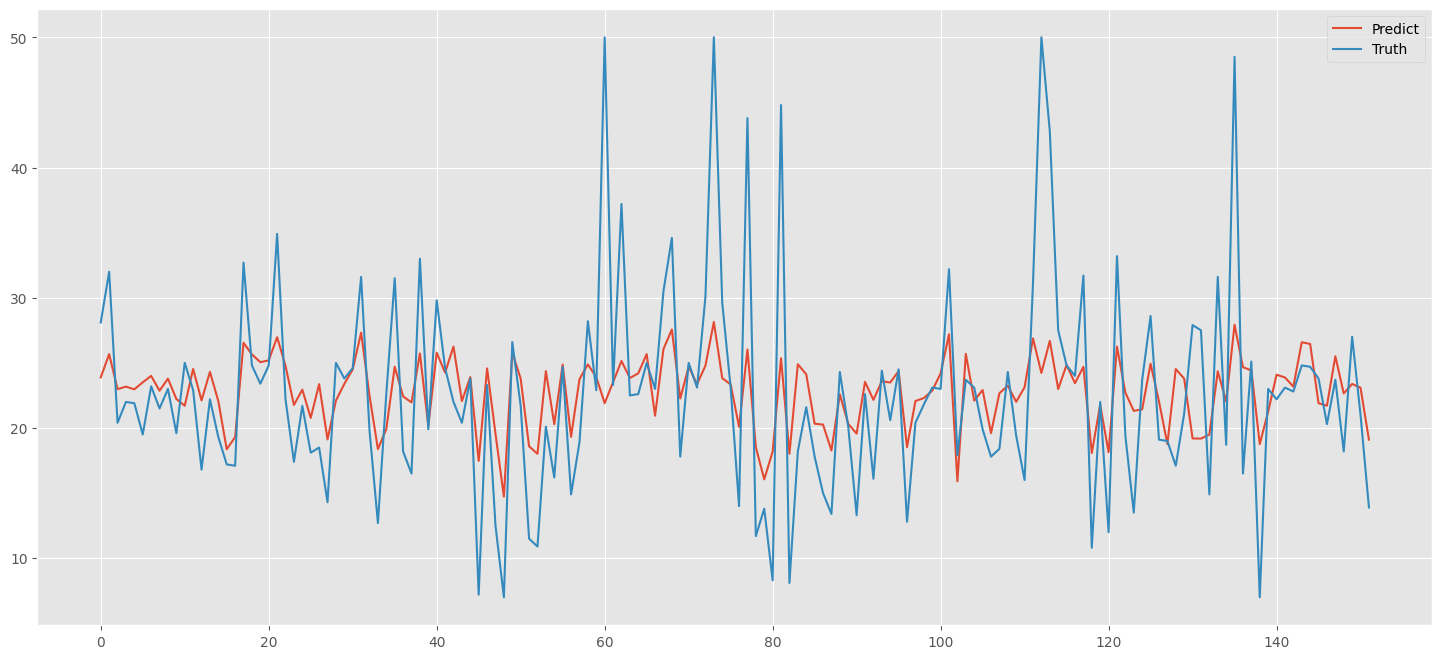

In [13]:
hos_pre = pd.DataFrame()
hos_pre['Predict'] = y_hat
hos_pre['Truth'] = y_1_test
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_1_test, y_hat))))
hos_pre.plot(figsize=(18,8))
print('最小二乘法得出的结果可以拟合趋势和均值，但是波峰和波谷预测不准')

In [17]:
print('接下来开始线性回归预测')

接下来开始线性回归预测


In [24]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
coef = linear_model.coef_#回归系数
line_pre = linear_model.predict(x_test)
print('SCORE:{:.4f}'.format(linear_model.score(x_test, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_1_test, line_pre))))

SCORE:0.6348
RMSE:4.8333


<AxesSubplot:>

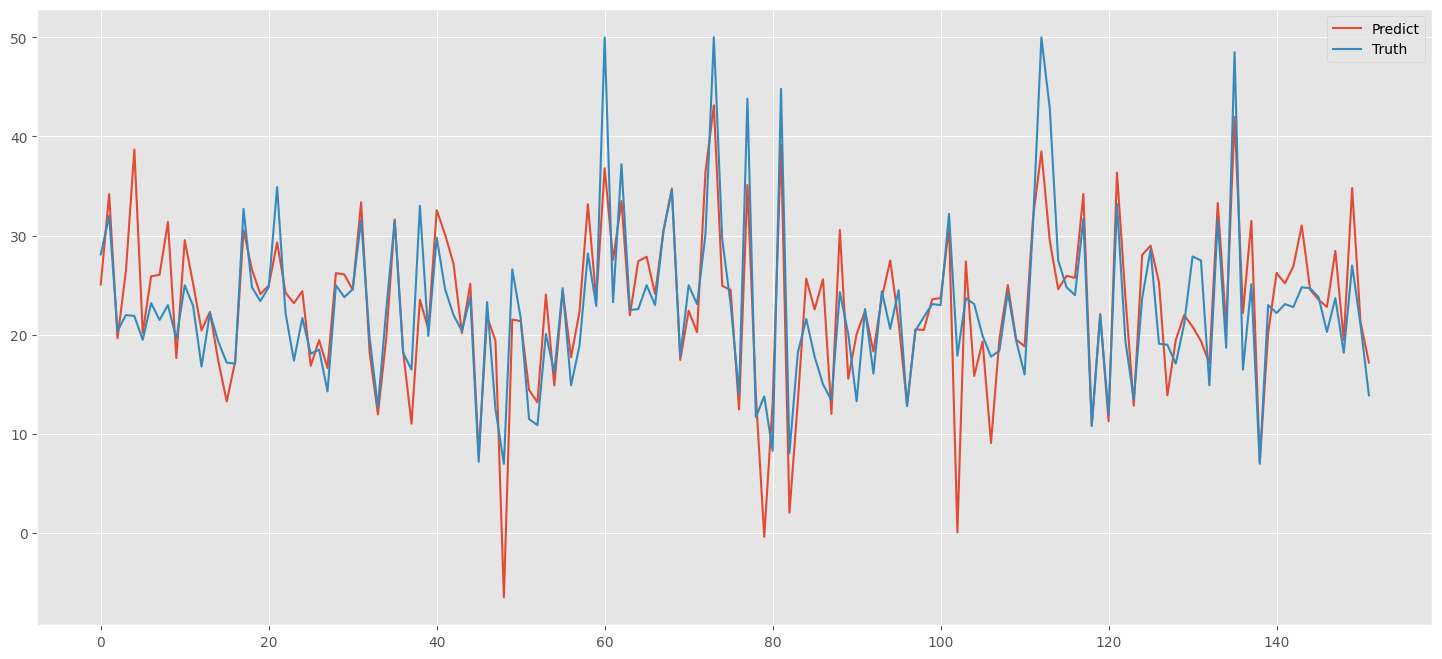

In [23]:
hos_pre = pd.DataFrame()
hos_pre['Predict'] = line_pre
hos_pre['Truth'] = y_1_test
hos_pre.plot(figsize=(18,8))

In [25]:
print('预测精度较高，基本准确')

预测精度较高，基本准确
